## Import Library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

## 1. Baca Gambar Asli

In [4]:
img = cv2.imread('diri.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_, buffer_ori = cv2.imencode('.jpg', img_rgb)
size_ori_kb = len(buffer_ori) / 1024

## 2. Kompresi LOSSY JPEG QUALITY=10

In [6]:
_, buffer_compressed = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
img_compressed = cv2.imdecode(np.frombuffer(buffer_compressed, np.uint8), cv2.IMREAD_COLOR)
img_compressed = cv2.cvtColor(img_compressed, cv2.COLOR_BGR2RGB)
size_compressed_kb = len(buffer_compressed) / 1024

## 3. Kuantisasi Warna RGB 4 Level/Channel

In [8]:
# Langkah: bagi 256 ke dalam 4 level → 0, 85, 170, 255
def quantize(img):
    factor = 256 // 4  # 4 level → 64
    return ((img // factor) * factor).astype(np.uint8)

img_quantized = quantize(img_rgb)

# Hitung ukuran kuantisasi (pakai encode jpg dengan quality default 95 sebagai acuan ukuran)
_, buffer_quant = cv2.imencode('.jpg', cv2.cvtColor(img_quantized, cv2.COLOR_RGB2BGR))
size_quant_kb = len(buffer_quant) / 1024

## Tampilkan Semua

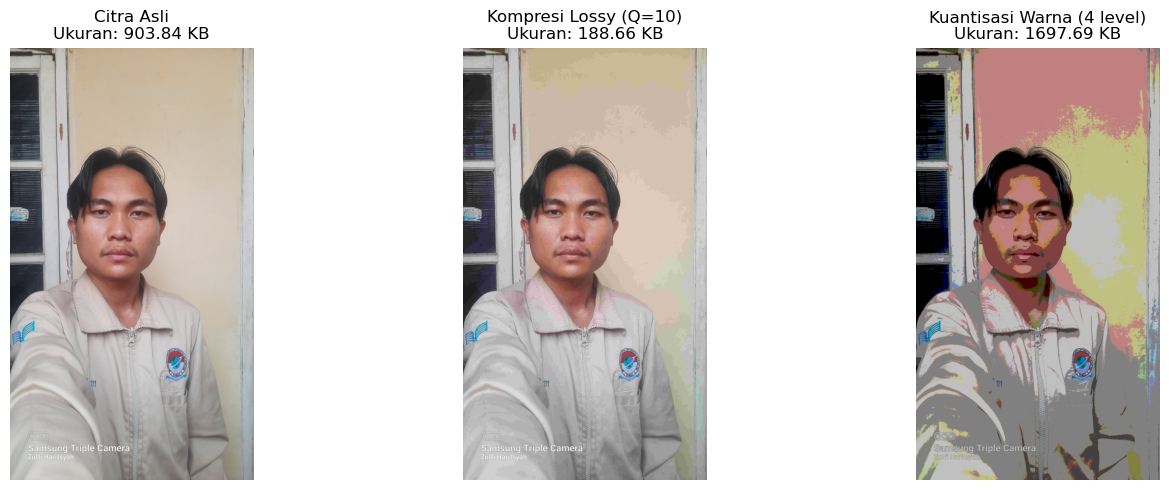

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(img_rgb)
axs[0].set_title(f'Citra Asli\nUkuran: {size_ori_kb:.2f} KB')
axs[0].axis('off')

axs[1].imshow(img_compressed)
axs[1].set_title(f'Kompresi Lossy (Q=10)\nUkuran: {size_compressed_kb:.2f} KB')
axs[1].axis('off')

axs[2].imshow(img_quantized)
axs[2].set_title(f'Kuantisasi Warna (4 level)\nUkuran: {size_quant_kb:.2f} KB')
axs[2].axis('off')

plt.tight_layout()
plt.show()